In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.listdir('./')

['.ipynb_checkpoints',
 'Customer Segmentation.ipynb',
 'Customerdata_Test.csv',
 'Customerdata_Train.csv',
 'Emaildata_Test.csv',
 'Emaildata_Train.csv',
 'final.csv',
 'merged.ipynb',
 'Test.csv',
 'Test_Data.ipynb',
 'Train data-Copy1.ipynb',
 'Train data-Copy2.ipynb',
 'Train data.ipynb',
 'Train.csv',
 'Train_data_Copy1_(1)_(1).ipynb',
 'transactionsdata_Test.csv',
 'transactionsdata_Train.csv',
 'Untitled.ipynb',
 'Untitled47.ipynb']

In [4]:
df1 = pd.read_csv('./Train.csv')
df2 = pd.read_csv('./Customerdata_Train.csv')
df3 = pd.read_csv('./transactionsdata_Train.csv')
df4 = pd.read_csv('./Emaildata_Train.csv')

In [5]:
df1.shape , df2.shape , df3.shape , df4.shape

((23820, 2), (23820, 7), (104755, 4), (517672, 6))

In [6]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['CustomerID', 'RetentionPotential'], dtype='object')
Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')


In [7]:
df1.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [8]:
df2.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [9]:
df3.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [10]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [11]:
data1 = pd.merge(df1,df2,on=['CustomerID'],how = 'inner')

In [12]:
data1.shape

(23820, 8)

In [13]:
data1.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [14]:
data1.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday


In [15]:
data1.isna().sum()

CustomerID              0
RetentionPotential      0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [16]:
len(data1)

23820

In [17]:
#data1['Year'] = pd.to_datetime(data1['DateOfRegistration']).dt.year
#data1 = data1.drop(['DateOfRegistration'],axis=1)

In [18]:
data1.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday


In [19]:
data1.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [20]:
data1['RetentionPotential'].value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

In [21]:
#df3['Year'] = pd.to_datetime(df3['DateOfOrder']).dt.year
#df3 = df3.drop(['DateOfOrder','timestamp'],axis=1)
df3 = df3.drop('timestamp',axis=1)

In [22]:
df3.nunique()

CustomerID       23820
DateOfOrder       3151
OrderQuantity      451
dtype: int64

In [23]:
#df3['Year'].value_counts()

In [24]:
#df4['Year'] = pd.to_datetime(df4['DateOfemail']).dt.year
#df4 = df4.drop(['DateOfemail','timestamp'],axis=1)
df4 = df4.drop(['timestamp'],axis=1)

In [25]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [26]:
df4['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [27]:
print(data1.columns)
print(df3.columns)
print(df4.columns)

Index(['CustomerID', 'RetentionPotential', 'City', 'DateOfRegistration',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')


In [28]:
#df3.drop('Year',axis=1)

In [29]:
#df3.groupby('CustomerID')['OrderQuantity'].apply(' '.join).reset_index()

In [30]:
d1 = df3.groupby(['CustomerID'])['OrderQuantity'].agg(sum).reset_index()

In [31]:
new = df3.groupby(['CustomerID'])['OrderQuantity'].count().reset_index()

In [32]:
new = new.rename(columns={'OrderQuantity':'No_Of_Orders'})

In [33]:
d1 = d1.merge(new,on='CustomerID')

In [34]:
d1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1


In [35]:
d1.shape

(23820, 3)

In [36]:
#l1 = []
#for row in d1['OrderQuantity']:
#    t = sum(row)
#    l1.append(t)
#l1

In [37]:
#d1['Order_Quantity'] = l1
#d1.drop('OrderQuantity',axis=1,inplace=True)

In [38]:
d1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1


In [39]:
d1.shape

(23820, 3)

In [40]:
d1.nunique()

CustomerID       23820
OrderQuantity     2206
No_Of_Orders       150
dtype: int64

In [41]:
data1.columns

Index(['CustomerID', 'RetentionPotential', 'City', 'DateOfRegistration',
       'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay'],
      dtype='object')

In [42]:
data2 = pd.merge(data1,d1,on=['CustomerID'],how='inner')

In [43]:
data2.shape

(23820, 10)

In [44]:
data2.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday,982,8
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday,43,1
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday,51,1
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday,60,1
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday,41,1


In [45]:
data2.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
OrderQuantity            2206
No_Of_Orders              150
dtype: int64

In [46]:
df4.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')

In [47]:
df4.shape

(517672, 5)

In [48]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [49]:
df4['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [50]:
df4_1 = df4.loc[df4['EmailType'] == 'WelcomeEmail']

In [51]:
df4_1

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable
5,C13831,2010-12-29,WelcomeEmail,yes,NotApplicable
6,C40881,2010-09-22,WelcomeEmail,yes,NotApplicable
7,C26246,2009-11-16,WelcomeEmail,yes,NotApplicable
8,C36136,2009-07-25,WelcomeEmail,yes,NotApplicable
9,C34046,2010-03-14,WelcomeEmail,yes,NotApplicable


In [52]:
df4_1['MailClicked'].value_counts()

NotApplicable    23820
Name: MailClicked, dtype: int64

In [53]:
df4_2 = df4.loc[df4['EmailType'] == 'CustomizedEmail']
df4_2

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no
23825,C16368,2013-01-14,CustomizedEmail,yes,no
23826,C16368,2013-02-25,CustomizedEmail,yes,no
23827,C16368,2013-07-12,CustomizedEmail,yes,no
23828,C16368,2012-11-05,CustomizedEmail,yes,no
23829,C16368,2013-04-07,CustomizedEmail,yes,yes


In [54]:
df4_2['MailClicked'].value_counts()

no     466011
yes     27841
Name: MailClicked, dtype: int64

In [55]:
d2 = df4_2.groupby(['CustomerID'])['EmailType'].agg('count').reset_index()

In [56]:
d2

,CustomerID,EmailType
0,C12116,31
1,C12119,41
2,C12122,45
3,C12123,28
4,C12124,32
5,C12125,44
6,C12127,45
7,C12128,43
8,C12129,1
9,C12130,45


In [57]:
data3 = pd.merge(df4_1,d2,on=['CustomerID'],how='outer')
data3.head()

,CustomerID,DateOfemail,EmailType_x,MailOpened,MailClicked,EmailType_y
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0


In [58]:
data3 = data3.rename(columns={'EmailType_x':'EmailType','EmailType_y':'CustomMails'})

In [59]:
data3.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0


In [60]:
df4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no


In [61]:
df4_3 = df4_2.loc[df4_2['MailOpened']=='yes']
df4_4 = df4_2.loc[df4_2['MailOpened']=='no']

In [62]:
d3 = df4_3.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()
d4 = df4_4.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()

In [63]:
d4

,CustomerID,MailOpened
0,C12116,27
1,C12119,28
2,C12122,45
3,C12123,22
4,C12124,28
5,C12125,43
6,C12127,44
7,C12128,38
8,C12130,43
9,C12131,48


In [64]:
data4 = pd.merge(data3,d3,on=['CustomerID'],how='outer')
data4

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0
5,C13831,2010-12-29,WelcomeEmail,yes,NotApplicable,34.0,32.0
6,C40881,2010-09-22,WelcomeEmail,yes,NotApplicable,48.0,40.0
7,C26246,2009-11-16,WelcomeEmail,yes,NotApplicable,40.0,35.0
8,C36136,2009-07-25,WelcomeEmail,yes,NotApplicable,69.0,2.0
9,C34046,2010-03-14,WelcomeEmail,yes,NotApplicable,38.0,14.0


In [65]:
data5 = pd.merge(data4,d4,on=['CustomerID'],how='outer')
data5.head()

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y,MailOpened
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0,NaN
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0,7.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0,3.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0,46.0


In [66]:
data5 = data5.rename(columns={'MailOpened_x':'MailOpened','MailOpened_y':'CustomMail_Open','MailOpened':'CustomMail_No'})

In [67]:
data5.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0,NaN
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0,7.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0,3.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0,46.0


In [68]:
df4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
23820,C16368,2013-05-20,CustomizedEmail,yes,no
23821,C16368,2013-02-05,CustomizedEmail,yes,no
23822,C16368,2012-11-26,CustomizedEmail,yes,no
23823,C16368,2013-05-30,CustomizedEmail,yes,no
23824,C16368,2013-05-18,CustomizedEmail,yes,no


In [69]:
df4_5 = df4_2.loc[df4_2['MailClicked']=='yes']
df4_6 = df4_2.loc[df4_2['MailClicked']=='no']

In [70]:
d5 = df4_5.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
d6 = df4_6.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
d6

,CustomerID,MailClicked
0,C12116,29
1,C12119,37
2,C12122,45
3,C12123,23
4,C12124,32
5,C12125,44
6,C12127,45
7,C12128,43
8,C12130,44
9,C12131,50


In [71]:
data6 = pd.merge(data5,d5,on=['CustomerID'],how='outer')
data6.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable,29.0,29.0,NaN,1.0
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable,95.0,88.0,7.0,10.0
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable,30.0,27.0,3.0,4.0
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable,64.0,18.0,46.0,10.0


In [72]:
data7 = pd.merge(data6,d6,on=['CustomerID'],how='outer',sort=True)
data7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y,MailClicked
0,C12116,2013-09-23,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0
1,C12117,2013-12-05,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12118,2013-09-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12119,2013-04-13,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0
4,C12120,2014-01-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN


In [73]:
data7 = data7.rename(columns={'MailClicked_x':'MailClicked','MailClicked_y':'MailClicked_Open','MailClicked':'MailClicked_No'})

In [74]:
data7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12116,2013-09-23,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0
1,C12117,2013-12-05,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12118,2013-09-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12119,2013-04-13,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0
4,C12120,2014-01-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN


In [75]:
data7.shape

(23820, 10)

In [76]:
data7.nunique()

CustomerID          23820
DateOfemail          2673
EmailType               1
MailOpened              1
MailClicked             1
CustomMails            83
CustomMail_Open        60
CustomMail_No          69
MailClicked_Open       29
MailClicked_No         79
dtype: int64

In [77]:
data = pd.merge(data2,data7,on=['CustomerID'],how='outer',sort=True)

In [78]:
data.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12116,Low,CITY3,9/23/2013,0,0,0,Friday,115,3,2013-09-23,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0
1,C12117,Low,CITY2,12/5/2013,1,0,0,Friday,41,1,2013-12-05,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12118,High,CITY4,9/10/2013,1,0,0,Wednesday,41,1,2013-09-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12119,Low,CITY2,4/13/2013,0,0,0,Monday,52,1,2013-04-13,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0
4,C12120,Low,CITY3,1/10/2014,1,0,0,Tuesday,31,1,2014-01-10,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN


In [79]:
data.shape

(23820, 19)

In [80]:
data.isna().sum()

CustomerID                  0
RetentionPotential          0
City                        0
DateOfRegistration          0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
OrderQuantity               0
No_Of_Orders                0
DateOfemail                 0
EmailType                   0
MailOpened                  0
MailClicked                 0
CustomMails              9709
CustomMail_Open         11638
CustomMail_No           10199
MailClicked_Open        15184
MailClicked_No           9752
dtype: int64

In [81]:
finaldata = data.fillna(0)

In [82]:
finaldata.to_csv('final.csv',index=False)

In [83]:
finaldata.isna().sum()

CustomerID              0
RetentionPotential      0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
No_Of_Orders            0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
CustomMails             0
CustomMail_Open         0
CustomMail_No           0
MailClicked_Open        0
MailClicked_No          0
dtype: int64

In [84]:
finaldata.dtypes

CustomerID               object
RetentionPotential       object
City                     object
DateOfRegistration       object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
DateOfemail              object
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
dtype: object

In [85]:
finaldata.shape

(23820, 19)

In [86]:
finaldata['MonthOfRegistration'] = pd.to_datetime(finaldata['DateOfRegistration']).dt.month
finaldata['MonthOfemail'] = pd.to_datetime(finaldata['DateOfemail']).dt.month
finaldata = finaldata.drop(['DateOfRegistration','DateOfemail'],axis=1)

In [87]:
finaldata.head()

,CustomerID,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail
0,C12116,Low,CITY3,0,0,0,Friday,115,3,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0,9,9
1,C12117,Low,CITY2,1,0,0,Friday,41,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,12,12
2,C12118,High,CITY4,1,0,0,Wednesday,41,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,9,9
3,C12119,Low,CITY2,0,0,0,Monday,52,1,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0,4,4
4,C12120,Low,CITY3,1,0,0,Tuesday,31,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,1,1


In [88]:
finaldata.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
OrderQuantity            2206
No_Of_Orders              150
EmailType                   1
MailOpened                  1
MailClicked                 1
CustomMails                84
CustomMail_Open            61
CustomMail_No              70
MailClicked_Open           30
MailClicked_No             80
MonthOfRegistration        12
MonthOfemail               12
dtype: int64

In [89]:
finaldata.dtypes

CustomerID               object
RetentionPotential       object
City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
MonthOfRegistration       int64
MonthOfemail              int64
dtype: object

In [90]:
cat_cols = finaldata.select_dtypes(include='object').columns
num_cols = finaldata.select_dtypes(exclude='object').columns

In [91]:
for col in cat_cols:
    finaldata[col] = finaldata[col].astype('category')

In [92]:
finaldata.dtypes

CustomerID              category
RetentionPotential      category
City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
OrderQuantity              int64
No_Of_Orders               int64
EmailType               category
MailOpened              category
MailClicked             category
CustomMails              float64
CustomMail_Open          float64
CustomMail_No            float64
MailClicked_Open         float64
MailClicked_No           float64
MonthOfRegistration        int64
MonthOfemail               int64
dtype: object

In [93]:
X = finaldata.drop('RetentionPotential',axis=1)

In [94]:
X.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail
0,C12116,CITY3,0,0,0,Friday,115,3,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0,9,9
1,C12117,CITY2,1,0,0,Friday,41,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,12,12
2,C12118,CITY4,1,0,0,Wednesday,41,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,9,9
3,C12119,CITY2,0,0,0,Monday,52,1,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0,4,4
4,C12120,CITY3,1,0,0,Tuesday,31,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,1,1


In [95]:
X1 = X[['OrderQuantity','No_Of_Orders']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)

X1 = scaler.transform(X1)

In [96]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X1) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_)
    
wcss

[69.65225891736547,
 25.010902252220355,
 13.189396863808115,
 9.191478037227515,
 6.936578079459725,
 5.617841169531038,
 4.918540330850146,
 4.31552182341264,
 3.757732315160998,
 3.3436881265103113]

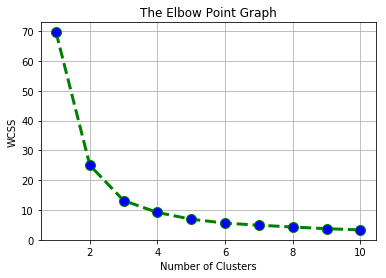

In [97]:
#plt.figure(figsize = (10,10))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
kmeans= KMeans(n_clusters = 3, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X1) #returns a cluster number for each of the data points
print(label)

[0 0 0 ... 0 0 0]


In [99]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
kmeans.cluster_centers_

array([[0.0030482 , 0.00509138],
       [0.05871695, 0.13222823],
       [0.22545889, 0.41745924]])

In [101]:
X['label'] = label
X.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,label
0,C12116,CITY3,0,0,0,Friday,115,3,WelcomeEmail,yes,NotApplicable,31.0,4.0,27.0,2.0,29.0,9,9,0
1,C12117,CITY2,1,0,0,Friday,41,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,12,12,0
2,C12118,CITY4,1,0,0,Wednesday,41,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,9,9,0
3,C12119,CITY2,0,0,0,Monday,52,1,WelcomeEmail,yes,NotApplicable,41.0,13.0,28.0,4.0,37.0,4,4,0
4,C12120,CITY3,1,0,0,Tuesday,31,1,WelcomeEmail,yes,NotApplicable,0.0,0.0,0.0,0.0,0.0,1,1,0


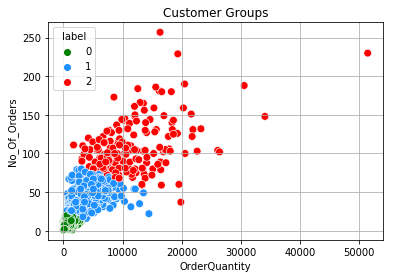

In [102]:
plt.grid()
sns.scatterplot(x='OrderQuantity',y='No_Of_Orders',hue='label',palette=['green','dodgerblue','red'],data=X,s=60)
plt.title('Customer Groups')
plt.xlabel('OrderQuantity')
plt.ylabel('No_Of_Orders')
plt.show()

In [103]:
low=X[X["label"]==0]
print('Number of customer in 1st group=', len(low))
print('They are -', low["CustomerID"].values)
print("--------------------------------------------")
medium=X[X["label"]==2]
print('Number of customer in 2nd group=', len(medium))
print('They are -', medium["CustomerID"].values)
print("--------------------------------------------")
high=X[X["label"]==1]
print('Number of customer in 3rd group=', len(high))
print('They are -', high["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 22700
They are - [C12116, C12117, C12118, C12119, C12120, ..., C42185, C42186, C42187, C42188, C42189]
Length: 22700
Categories (23820, object): [C12116, C12117, C12118, C12119, ..., C42186, C42187, C42188, C42189]
--------------------------------------------
Number of customer in 2nd group= 184
They are - [C12169, C12190, C12196, C12215, C12321, ..., C41394, C41429, C41615, C41754, C41982]
Length: 184
Categories (23820, object): [C12116, C12117, C12118, C12119, ..., C42186, C42187, C42188, C42189]
--------------------------------------------
Number of customer in 3rd group= 936
They are - [C12131, C12309, C12314, C12377, C12392, ..., C42057, C42080, C42118, C42158, C42181]
Length: 936
Categories (23820, object): [C12116, C12117, C12118, C12119, ..., C42186, C42187, C42188, C42189]
--------------------------------------------


In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
import numpy as np
import pandas as pd

In [106]:
import os
os.listdir('./')

['.ipynb_checkpoints',
 'Customer Segmentation.ipynb',
 'Customerdata_Test.csv',
 'Customerdata_Train.csv',
 'Emaildata_Test.csv',
 'Emaildata_Train.csv',
 'final.csv',
 'merged.ipynb',
 'Test.csv',
 'Test_Data.ipynb',
 'Train data-Copy1.ipynb',
 'Train data-Copy2.ipynb',
 'Train data.ipynb',
 'Train.csv',
 'Train_data_Copy1_(1)_(1).ipynb',
 'transactionsdata_Test.csv',
 'transactionsdata_Train.csv',
 'Untitled.ipynb',
 'Untitled47.ipynb']

In [107]:
dt1 = pd.read_csv('./Test.csv')
dt2 = pd.read_csv('./Customerdata_Test.csv')
dt3 = pd.read_csv('./transactionsdata_Test.csv')
dt4 = pd.read_csv('./Emaildata_Test.csv')

In [108]:
dt1.shape , dt2.shape , dt3.shape , dt4.shape

((5955, 1), (5955, 7), (26768, 4), (129074, 6))

In [109]:
print(dt1.columns)
print(dt2.columns)
print(dt3.columns)
print(dt4.columns)

Index(['CustomerID'], dtype='object')
Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')


In [110]:
dt1.nunique()

CustomerID    5955
dtype: int64

In [111]:
dt2.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [112]:
dt3.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [113]:
dt4.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [114]:
dtest1 = pd.merge(dt1,dt2,on=['CustomerID'],how = 'inner')

In [115]:
dtest1.shape

(5955, 7)

In [116]:
dtest1.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [117]:
dtest1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,CITY1,12/4/2017,1,0,0,Friday
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday
2,C12134,CITY3,9/18/2013,1,0,0,Monday
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday
4,C12136,CITY2,9/28/2013,1,0,0,Thursday


In [118]:
dtest1.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [119]:
len(dtest1)

5955

In [120]:
#dtest1['Year'] = pd.to_datetime(dtest1['DateOfRegistration']).dt.year
#dtest1 = dtest1.drop(['DateOfRegistration'],axis=1)

In [121]:
dtest1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,CITY1,12/4/2017,1,0,0,Friday
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday
2,C12134,CITY3,9/18/2013,1,0,0,Monday
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday
4,C12136,CITY2,9/28/2013,1,0,0,Thursday


In [122]:
dtest1.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [123]:
#dtest1['RetentionPotential'].value_counts()

In [124]:
#dt3['Year'] = pd.to_datetime(dt3['DateOfOrder']).dt.year
#dt3 = dt3.drop(['DateOfOrder','timestamp'],axis=1)
dt3 = dt3.drop('timestamp',axis=1)

In [125]:
dt3.nunique()

CustomerID       5955
DateOfOrder      2771
OrderQuantity     372
dtype: int64

In [126]:
#dt3['Year'].value_counts()

In [127]:
#dt4['Year'] = pd.to_datetime(dt4['DateOfemail']).dt.year
#dt4 = dt4.drop(['DateOfemail','timestamp'],axis=1)
dt4 = dt4.drop(['timestamp'],axis=1)

In [128]:
dt4.nunique()

CustomerID     5955
DateOfemail    3149
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [129]:
dt4['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [130]:
print(dtest1.columns)
print(dt3.columns)
print(dt4.columns)

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')


In [131]:
#dt3.drop('Year',axis=1)

In [132]:
#dt3.groupby('CustomerID')['OrderQuantity'].apply(' '.join).reset_index()

In [133]:
test1 = dt3.groupby(['CustomerID'])['OrderQuantity'].agg(sum).reset_index()

In [134]:
new1 = dt3.groupby(['CustomerID'])['OrderQuantity'].agg('count').reset_index()

In [135]:
new1 = new1.rename(columns={'OrderQuantity':'No_Of_Orders'})

In [136]:
test1 = test1.merge(new1,on='CustomerID')

In [137]:
#test1['DateOfOrder'] = dt3['DateOfOrder']

In [138]:
test1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1


In [139]:
test1.shape

(5955, 3)

In [140]:
#l1 = []
#for row in test1['OrderQuantity']:
#    t = sum(row)
#    l1.append(t)
#l1

In [141]:
#test1['Order_Quantity'] = l1
#test1.drop('OrderQuantity',axis=1,inplace=True)

In [142]:
test1.head()

,CustomerID,OrderQuantity,No_Of_Orders
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1


In [143]:
test1.shape

(5955, 3)

In [144]:
test1.nunique()

CustomerID       5955
OrderQuantity    1030
No_Of_Orders      106
dtype: int64

In [145]:
dtest1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [146]:
dtest2 = pd.merge(dtest1,test1,on=['CustomerID'],how='inner')

In [147]:
dtest2.shape

(5955, 9)

In [148]:
dtest2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders
0,C12121,CITY1,12/4/2017,1,0,0,Friday,52,1
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday,40,1
2,C12134,CITY3,9/18/2013,1,0,0,Monday,40,1
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday,41,1
4,C12136,CITY2,9/28/2013,1,0,0,Thursday,79,1


In [149]:
dtest2.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
OrderQuantity           1030
No_Of_Orders             106
dtype: int64

In [150]:
dt4.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')

In [151]:
dt4.shape

(129074, 5)

In [152]:
dt4.nunique()

CustomerID     5955
DateOfemail    3149
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [153]:
dt4['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [154]:
dt4_1 = dt4.loc[dt4['EmailType'] == 'WelcomeEmail']

In [155]:
dt4_1

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable
5,C31010,2010-04-24,WelcomeEmail,yes,NotApplicable
6,C24517,2010-07-24,WelcomeEmail,yes,NotApplicable
7,C30981,2011-02-09,WelcomeEmail,yes,NotApplicable
8,C23833,2010-08-27,WelcomeEmail,yes,NotApplicable
9,C25929,2010-06-16,WelcomeEmail,yes,NotApplicable


In [156]:
dt4_1['MailClicked'].value_counts()

NotApplicable    5955
Name: MailClicked, dtype: int64

In [157]:
dt4_2 = dt4.loc[dt4['EmailType'] == 'CustomizedEmail']
dt4_2

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,yes,no
5956,C12403,2009-10-13,CustomizedEmail,yes,no
5957,C12403,2010-09-09,CustomizedEmail,yes,no
5958,C12403,2011-02-13,CustomizedEmail,yes,no
5959,C12403,2012-08-15,CustomizedEmail,no,no
5960,C12403,2011-06-15,CustomizedEmail,yes,no
5961,C12403,2009-07-20,CustomizedEmail,yes,no
5962,C12403,2011-04-15,CustomizedEmail,yes,no
5963,C12403,2012-08-03,CustomizedEmail,yes,no
5964,C12403,2012-12-24,CustomizedEmail,no,no


In [158]:
dt4_2['MailClicked'].value_counts()

no     116201
yes      6918
Name: MailClicked, dtype: int64

In [159]:
test2 = dt4_2.groupby(['CustomerID'])['EmailType'].agg('count').reset_index()

In [160]:
test2

,CustomerID,EmailType
0,C12121,24
1,C12135,29
2,C12136,41
3,C12157,27
4,C12163,46
5,C12167,28
6,C12175,16
7,C12198,46
8,C12203,43
9,C12212,45


In [161]:
dtest3 = pd.merge(dt4_1,test2,on=['CustomerID'],how='outer')
dtest3.head()

,CustomerID,DateOfemail,EmailType_x,MailOpened,MailClicked,EmailType_y
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0


In [162]:
dtest3 = dtest3.rename(columns={'EmailType_x':'EmailType','EmailType_y':'CustomMails'})

In [163]:
dtest3.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0


In [164]:
dt4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,yes,no
5956,C12403,2009-10-13,CustomizedEmail,yes,no
5957,C12403,2010-09-09,CustomizedEmail,yes,no
5958,C12403,2011-02-13,CustomizedEmail,yes,no
5959,C12403,2012-08-15,CustomizedEmail,no,no


In [165]:
dt4_3 = dt4_2.loc[dt4_2['MailOpened']=='yes']
dt4_4 = dt4_2.loc[dt4_2['MailOpened']=='no']

In [166]:
test3 = dt4_3.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()
test4 = dt4_4.groupby(['CustomerID'])['MailOpened'].agg('count').reset_index()

In [167]:
test4

,CustomerID,MailOpened
0,C12121,16
1,C12135,21
2,C12136,38
3,C12157,14
4,C12163,45
5,C12167,21
6,C12175,16
7,C12198,43
8,C12203,41
9,C12212,41


In [168]:
dtest4 = pd.merge(dtest3,test3,on=['CustomerID'],how='outer')
dtest4

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0
5,C31010,2010-04-24,WelcomeEmail,yes,NotApplicable,NaN,NaN
6,C24517,2010-07-24,WelcomeEmail,yes,NotApplicable,31.0,31.0
7,C30981,2011-02-09,WelcomeEmail,yes,NotApplicable,40.0,1.0
8,C23833,2010-08-27,WelcomeEmail,yes,NotApplicable,NaN,NaN
9,C25929,2010-06-16,WelcomeEmail,yes,NotApplicable,16.0,NaN


In [169]:
dtest5 = pd.merge(dtest4,test4,on=['CustomerID'],how='outer')
dtest5.head()

,CustomerID,DateOfemail,EmailType,MailOpened_x,MailClicked,CustomMails,MailOpened_y,MailOpened
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0,9.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0,34.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0,5.0


In [170]:
dtest5 = dtest5.rename(columns={'MailOpened_x':'MailOpened','MailOpened_y':'CustomMail_Open','MailOpened':'CustomMail_No'})

In [171]:
dtest5.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0,9.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0,34.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN,45.0
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0,5.0


In [172]:
dt4_2.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
5955,C12403,2012-03-06,CustomizedEmail,yes,no
5956,C12403,2009-10-13,CustomizedEmail,yes,no
5957,C12403,2010-09-09,CustomizedEmail,yes,no
5958,C12403,2011-02-13,CustomizedEmail,yes,no
5959,C12403,2012-08-15,CustomizedEmail,no,no


In [173]:
dt4_5 = dt4_2.loc[dt4_2['MailClicked']=='yes']
dt4_6 = dt4_2.loc[dt4_2['MailClicked']=='no']

In [174]:
test5 = dt4_5.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
test6 = dt4_6.groupby(['CustomerID'])['MailClicked'].agg('count').reset_index()
test6

,CustomerID,MailClicked
0,C12121,21
1,C12135,24
2,C12136,40
3,C12157,27
4,C12163,46
5,C12167,24
6,C12175,16
7,C12198,45
8,C12203,43
9,C12212,44


In [175]:
dtest6 = pd.merge(dtest5,test5,on=['CustomerID'],how='outer')
dtest6.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable,46.0,37.0,9.0,7.0
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable,60.0,26.0,34.0,4.0
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable,45.0,NaN,45.0,NaN
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable,13.0,8.0,5.0,2.0


In [176]:
dtest7 = pd.merge(dtest6,test6,on=['CustomerID'],how='outer',sort=True)
dtest7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked_x,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_y,MailClicked
0,C12121,2017-12-04,WelcomeEmail,yes,NotApplicable,24.0,8.0,16.0,3.0,21.0
1,C12132,2013-10-20,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12134,2013-09-18,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12135,2017-11-01,WelcomeEmail,yes,NotApplicable,29.0,8.0,21.0,5.0,24.0
4,C12136,2013-09-28,WelcomeEmail,yes,NotApplicable,41.0,3.0,38.0,1.0,40.0


In [177]:
dtest7 = dtest7.rename(columns={'MailClicked_x':'MailClicked','MailClicked_y':'MailClicked_Open','MailClicked':'MailClicked_No'})

In [178]:
dtest7.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12121,2017-12-04,WelcomeEmail,yes,NotApplicable,24.0,8.0,16.0,3.0,21.0
1,C12132,2013-10-20,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12134,2013-09-18,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12135,2017-11-01,WelcomeEmail,yes,NotApplicable,29.0,8.0,21.0,5.0,24.0
4,C12136,2013-09-28,WelcomeEmail,yes,NotApplicable,41.0,3.0,38.0,1.0,40.0


In [179]:
dtest7.shape

(5955, 10)

In [180]:
dtest7.nunique()

CustomerID          5955
DateOfemail         1631
EmailType              1
MailOpened             1
MailClicked            1
CustomMails           75
CustomMail_Open       51
CustomMail_No         63
MailClicked_Open      22
MailClicked_No        72
dtype: int64

In [181]:
dtest = pd.merge(dtest2,dtest7,on=['CustomerID'],how='outer',sort=True)

In [182]:
dtest.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,DateOfemail,EmailType,MailOpened,MailClicked,CustomMails,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No
0,C12121,CITY1,12/4/2017,1,0,0,Friday,52,1,2017-12-04,WelcomeEmail,yes,NotApplicable,24.0,8.0,16.0,3.0,21.0
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday,40,1,2013-10-20,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
2,C12134,CITY3,9/18/2013,1,0,0,Monday,40,1,2013-09-18,WelcomeEmail,yes,NotApplicable,NaN,NaN,NaN,NaN,NaN
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday,41,1,2017-11-01,WelcomeEmail,yes,NotApplicable,29.0,8.0,21.0,5.0,24.0
4,C12136,CITY2,9/28/2013,1,0,0,Thursday,79,1,2013-09-28,WelcomeEmail,yes,NotApplicable,41.0,3.0,38.0,1.0,40.0


In [183]:
dtest.shape

(5955, 18)

In [184]:
dtest.isna().sum()

CustomerID                 0
City                       0
DateOfRegistration         0
OnlineCommunication        0
AutomaticRefill            0
DoorstepDelivery           0
PreferredDeliveryDay       0
OrderQuantity              0
No_Of_Orders               0
DateOfemail                0
EmailType                  0
MailOpened                 0
MailClicked                0
CustomMails             2457
CustomMail_Open         2949
CustomMail_No           2578
MailClicked_Open        3786
MailClicked_No          2471
dtype: int64

In [185]:
finaldtest = dtest.fillna(0)

In [186]:
#finaldtest.to_csv('final.csv',index=False)

In [187]:
finaldtest.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
No_Of_Orders            0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
CustomMails             0
CustomMail_Open         0
CustomMail_No           0
MailClicked_Open        0
MailClicked_No          0
dtype: int64

In [188]:
finaldtest.dtypes

CustomerID               object
City                     object
DateOfRegistration       object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
DateOfemail              object
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
dtype: object

In [189]:
finaldtest.shape

(5955, 18)

In [190]:
finaldtest['MonthOfRegistration'] = pd.to_datetime(finaldtest['DateOfRegistration']).dt.month
finaldtest['MonthOfemail'] = pd.to_datetime(finaldtest['DateOfemail']).dt.month
finaldtest['YearOfRegistration'] = pd.to_datetime(finaldtest['DateOfRegistration']).dt.year
finaldtest['YearOfemail'] = pd.to_datetime(finaldtest['DateOfemail']).dt.year
finaldtest['Date_of_Registration'] = pd.to_datetime(finaldtest['DateOfRegistration']).dt.day
finaldtest['Date_of_email'] = pd.to_datetime(finaldtest['DateOfemail']).dt.day
finaldtest = finaldtest.drop(['DateOfRegistration','DateOfemail'],axis=1)



In [191]:
finaldtest.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,...,CustomMail_Open,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email
0,C12121,CITY1,1,0,0,Friday,52,1,WelcomeEmail,yes,...,8.0,16.0,3.0,21.0,12,12,2017,2017,4,4
1,C12132,CITY3,1,0,0,Tuesday,40,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,10,10,2013,2013,20,20
2,C12134,CITY3,1,0,0,Monday,40,1,WelcomeEmail,yes,...,0.0,0.0,0.0,0.0,9,9,2013,2013,18,18
3,C12135,CITY3,1,0,1,Wednesday,41,1,WelcomeEmail,yes,...,8.0,21.0,5.0,24.0,11,11,2017,2017,1,1
4,C12136,CITY2,1,0,0,Thursday,79,1,WelcomeEmail,yes,...,3.0,38.0,1.0,40.0,9,9,2013,2013,28,28


In [192]:
finaldtest.nunique()

CustomerID              5955
City                       4
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
OrderQuantity           1030
No_Of_Orders             106
EmailType                  1
MailOpened                 1
MailClicked                1
CustomMails               76
CustomMail_Open           52
CustomMail_No             64
MailClicked_Open          23
MailClicked_No            73
MonthOfRegistration       12
MonthOfemail              12
YearOfRegistration        11
YearOfemail               11
Date_of_Registration      31
Date_of_email             31
dtype: int64

In [193]:
finaldtest.isna().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity           0
No_Of_Orders            0
EmailType               0
MailOpened              0
MailClicked             0
CustomMails             0
CustomMail_Open         0
CustomMail_No           0
MailClicked_Open        0
MailClicked_No          0
MonthOfRegistration     0
MonthOfemail            0
YearOfRegistration      0
YearOfemail             0
Date_of_Registration    0
Date_of_email           0
dtype: int64

In [194]:
finaldtest.dtypes

CustomerID               object
City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
OrderQuantity             int64
No_Of_Orders              int64
EmailType                object
MailOpened               object
MailClicked              object
CustomMails             float64
CustomMail_Open         float64
CustomMail_No           float64
MailClicked_Open        float64
MailClicked_No          float64
MonthOfRegistration       int64
MonthOfemail              int64
YearOfRegistration        int64
YearOfemail               int64
Date_of_Registration      int64
Date_of_email             int64
dtype: object

In [195]:
finaldtest['OnlineCommunication'] = finaldtest['OnlineCommunication'].astype('object')
finaldtest['DoorstepDelivery'] = finaldtest['DoorstepDelivery'].astype('object')
finaldtest['AutomaticRefill'] = finaldtest['AutomaticRefill'].astype('object')

In [196]:
cat_cols = finaldtest.select_dtypes(include='object').columns
num_cols = finaldtest.select_dtypes(exclude='object').columns

In [197]:
for col in cat_cols:
    finaldtest[col] = finaldtest[col].astype('category')

In [198]:
finaldtest.dtypes

CustomerID              category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
OrderQuantity              int64
No_Of_Orders               int64
EmailType               category
MailOpened              category
MailClicked             category
CustomMails              float64
CustomMail_Open          float64
CustomMail_No            float64
MailClicked_Open         float64
MailClicked_No           float64
MonthOfRegistration        int64
MonthOfemail               int64
YearOfRegistration         int64
YearOfemail                int64
Date_of_Registration       int64
Date_of_email              int64
dtype: object

In [199]:
t_ip = finaldtest[['OrderQuantity','No_Of_Orders']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(t_ip)

t_ip = scaler.transform(t_ip)

In [200]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(t_ip) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_)
    
wcss

[33.689956465409935,
 11.799927157741553,
 6.098634056866544,
 3.9023299569045458,
 2.761227906049405,
 2.1377277238414916,
 1.6665438310856666,
 1.405197880298318,
 1.1620078605683746,
 0.992271539937025]

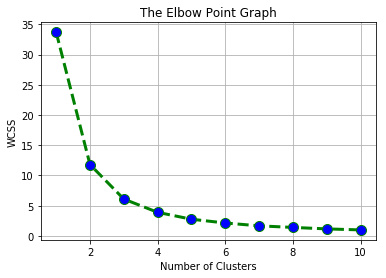

In [201]:
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [202]:
kmeans= KMeans(n_clusters = 3, init = 'k-means++') #initialize the class object
labels = kmeans.fit_predict(t_ip) #returns a cluster number for each of the data points
print(labels)
finaldtest['labels'] = labels
finaldtest.head()

[0 0 0 ... 0 0 0]


,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,...,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email,labels
0,C12121,CITY1,1,0,0,Friday,52,1,WelcomeEmail,yes,...,16.0,3.0,21.0,12,12,2017,2017,4,4,0
1,C12132,CITY3,1,0,0,Tuesday,40,1,WelcomeEmail,yes,...,0.0,0.0,0.0,10,10,2013,2013,20,20,0
2,C12134,CITY3,1,0,0,Monday,40,1,WelcomeEmail,yes,...,0.0,0.0,0.0,9,9,2013,2013,18,18,0
3,C12135,CITY3,1,0,1,Wednesday,41,1,WelcomeEmail,yes,...,21.0,5.0,24.0,11,11,2017,2017,1,1,0
4,C12136,CITY2,1,0,0,Thursday,79,1,WelcomeEmail,yes,...,38.0,1.0,40.0,9,9,2013,2013,28,28,0


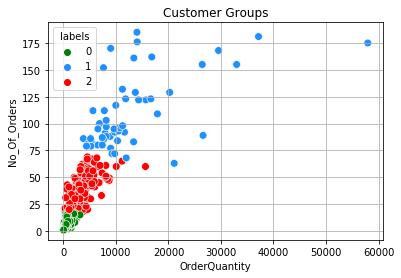

In [203]:
plt.grid()
sns.scatterplot(x='OrderQuantity',y='No_Of_Orders',hue='labels',palette=['green','dodgerblue','red'],data=finaldtest,s=60)
plt.title('Customer Groups')
plt.xlabel('OrderQuantity')
plt.ylabel('No_Of_Orders')
plt.show()

In [204]:
low_test=finaldtest[finaldtest["labels"]==0]
print('Low group=', len(low_test))
print('They are -', low_test["CustomerID"].values)
print("--------------------------------------------")

medium_test=finaldtest[finaldtest["labels"]==2]
print('medium group=', len(medium_test))
print('They are -', medium_test["CustomerID"].values)
print("--------------------------------------------")

high_test=finaldtest[finaldtest["labels"]==1]
print('High group=', len(high_test))
print('They are -', high_test["CustomerID"].values)
print("--------------------------------------------")

Low group= 5668
They are - [C12121, C12132, C12134, C12135, C12136, ..., C42153, C42155, C42157, C42167, C42190]
Length: 5668
Categories (5955, object): [C12121, C12132, C12134, C12135, ..., C42155, C42157, C42167, C42190]
--------------------------------------------
medium group= 234
They are - [C12219, C12258, C12374, C12581, C12586, ..., C41681, C41962, C42090, C42122, C42148]
Length: 234
Categories (5955, object): [C12121, C12132, C12134, C12135, ..., C42155, C42157, C42167, C42190]
--------------------------------------------
High group= 53
They are - [C12403, C13449, C14210, C15033, C15397, ..., C39333, C39420, C39868, C41389, C42025]
Length: 53
Categories (5955, object): [C12121, C12132, C12134, C12135, ..., C42155, C42157, C42167, C42190]
--------------------------------------------


In [205]:
finaldtest['labels'].replace(to_replace=0,value='2',inplace=True)
finaldtest['labels'].replace(to_replace=2,value='1',inplace=True)
finaldtest['labels'].replace(to_replace=1,value='0',inplace=True)

In [206]:
finaldtest.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,No_Of_Orders,EmailType,MailOpened,...,CustomMail_No,MailClicked_Open,MailClicked_No,MonthOfRegistration,MonthOfemail,YearOfRegistration,YearOfemail,Date_of_Registration,Date_of_email,labels
0,C12121,CITY1,1,0,0,Friday,52,1,WelcomeEmail,yes,...,16.0,3.0,21.0,12,12,2017,2017,4,4,2
1,C12132,CITY3,1,0,0,Tuesday,40,1,WelcomeEmail,yes,...,0.0,0.0,0.0,10,10,2013,2013,20,20,2
2,C12134,CITY3,1,0,0,Monday,40,1,WelcomeEmail,yes,...,0.0,0.0,0.0,9,9,2013,2013,18,18,2
3,C12135,CITY3,1,0,1,Wednesday,41,1,WelcomeEmail,yes,...,21.0,5.0,24.0,11,11,2017,2017,1,1,2
4,C12136,CITY2,1,0,0,Thursday,79,1,WelcomeEmail,yes,...,38.0,1.0,40.0,9,9,2013,2013,28,28,2


In [207]:
finaldtest['labels'].value_counts()

2    5668
1     234
0      53
Name: labels, dtype: int64